In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df1=df.dropna(axis=1)
df1.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.rename(columns={'v1':'class','v2':'text'},inplace=True)
df1.head()

/tmp/ipykernel_17/782546124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'v1':'class','v2':'text'},inplace=True)


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df1['class']=encoder.fit_transform(df1['class'])
df1.head()

/tmp/ipykernel_17/2662037255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class']=encoder.fit_transform(df1['class'])


,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df1.duplicated().sum()

403

In [12]:
df1.drop_duplicates(keep='first',inplace=True)
df1.duplicated().sum()

/tmp/ipykernel_17/4158334152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(keep='first',inplace=True)


0

In [13]:
df1.shape

(5169, 2)

**EDA
**

In [14]:
df1['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

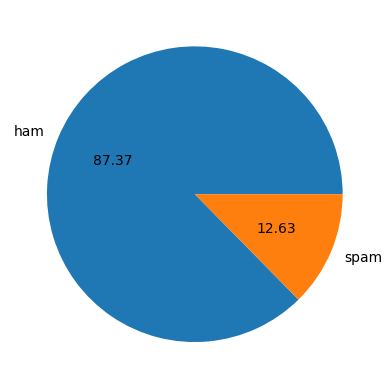

In [15]:
import matplotlib.pyplot as plt
plt.pie(df1['class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df1['num_caracters']=df1['text'].apply(len)
df1.head()

/tmp/ipykernel_17/735207069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_caracters']=df1['text'].apply(len)


,class,text,num_caracters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df1['num_words']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df1.head()

/tmp/ipykernel_17/2292028151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,class,text,num_caracters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df1.head()

/tmp/ipykernel_17/3787345980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,class,text,num_caracters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df1[['num_caracters','num_words','num_sentences']].describe()

,num_caracters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [22]:
df2=df1[['class','num_caracters','num_words','num_sentences']]
df2.groupby('class').describe()

num_caracters                                                           \
              count        mean        std   min    25%    50%    75%    max   
class                                                                          
0            4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1             653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

      num_words             ...              num_sentences            \
          count       mean  ...   75%    max         count      mean   
class                       ...                                        
0        4516.0  16.957484  ...  22.0  219.0        4516.0  1.815545   
1         653.0  27.474732  ...  32.0   44.0         653.0  2.969372   

                                           
            std  min  25%  50%  75%   max  
class                                      
0      1.364098  1.0  1.0  1.0  2.0  38.0  
1      1.488910  1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


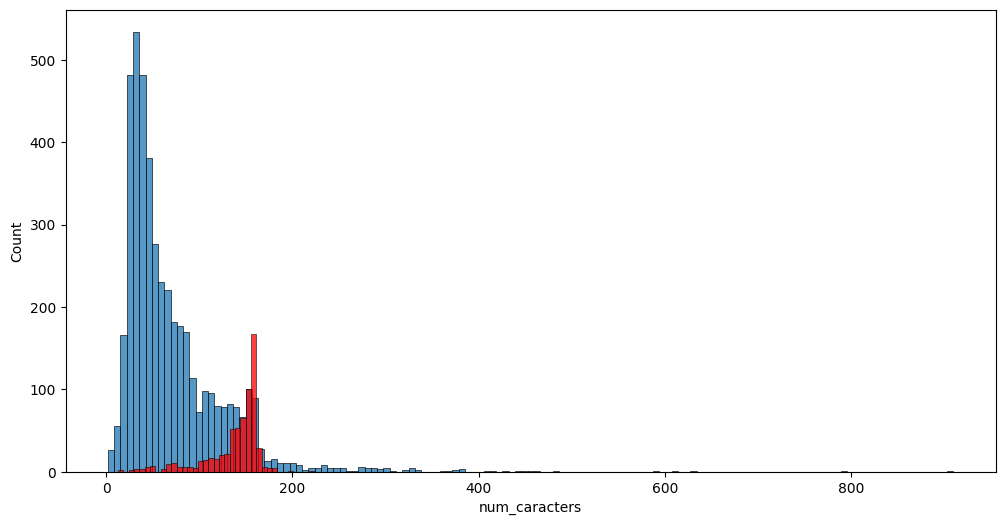

In [23]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['class'] == 0]['num_caracters'])
sns.histplot(df1[df1['class'] == 1]['num_caracters'],color='r')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


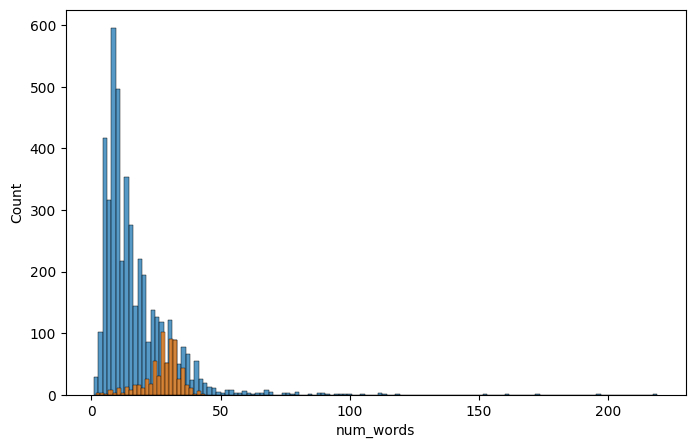

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df1[df1['class'] == 0]['num_words'])
sns.histplot(df1[df1['class'] == 1]['num_words'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

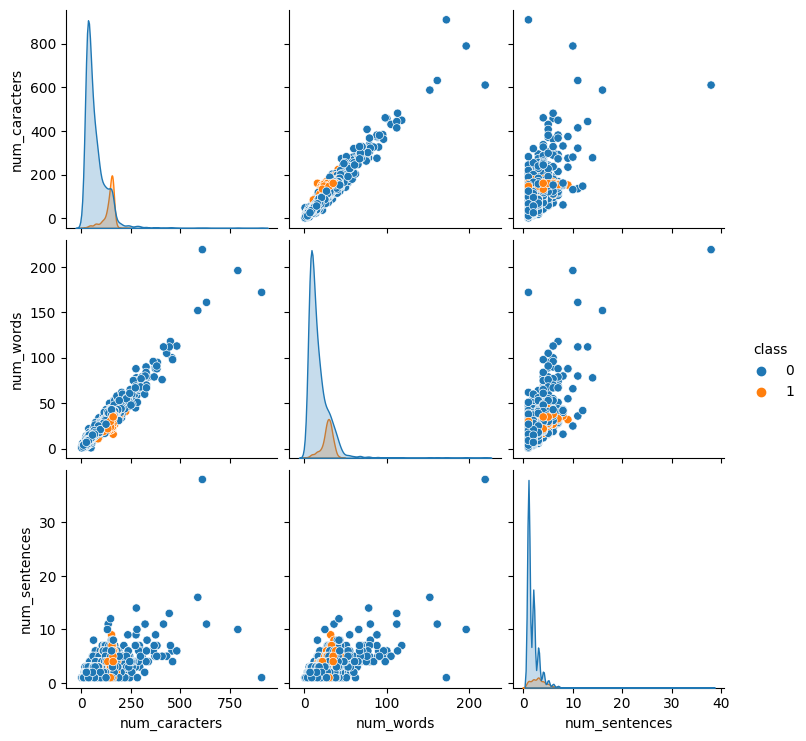

In [25]:
sns.pairplot(df1,hue='class')

<Axes: >

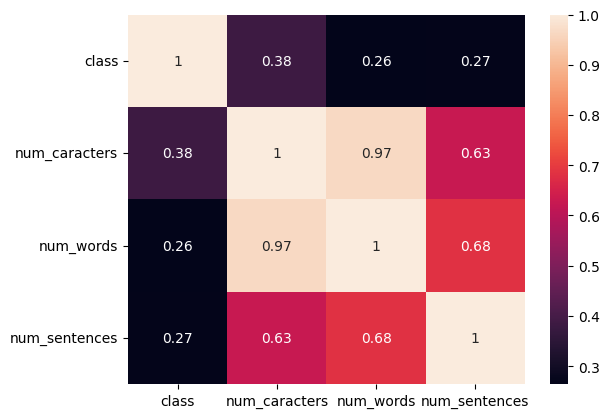

In [26]:
sns.heatmap(df2.corr(),annot=True)

**Data Preprocessing**

lower text
tokenization
remove special caracters 
remove stopwords
stemming

In [27]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)
        

    
    

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried e")

'gon na home soon want talk stuff anymor tonight k cri e'

In [29]:
df1['transformed_text']=df1['text'].apply(transform_text)
df1.head()

/tmp/ipykernel_17/1569539766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transformed_text']=df1['text'].apply(transform_text)


,class,text,num_caracters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [30]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=800,background_color='white')

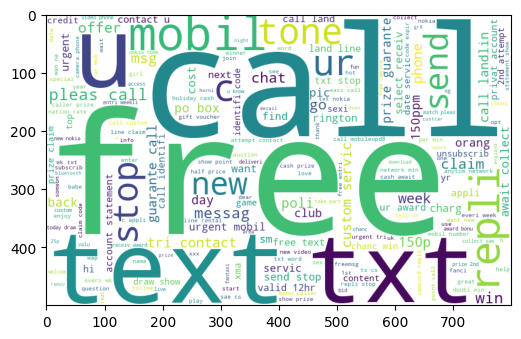

In [31]:
spam_wc=wc.generate(df1[df1['class'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

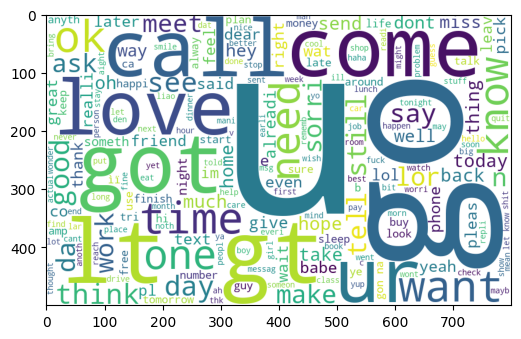

In [32]:
ham_wc=wc.generate(df1[df1['class'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(6,6))
plt.imshow(ham_wc)

In [33]:
df1.head()

,class,text,num_caracters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
spam_corpus=[]
for msg in df1[df1['class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [35]:
len(spam_corpus)

9883

In [36]:
ham_corpus=[]
for msg in df1[df1['class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [37]:
len(ham_corpus)

34771

**Model Building**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [39]:
X=tfid.fit_transform(df1['transformed_text']).toarray()

In [40]:
X.shape

(5169, 3000)

In [41]:
y=df1['class'].values
y.shape

(5169,)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8,stratify=y)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [44]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score


In [46]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
cm=confusion_matrix(y_pred1,y_test)
print(cm)
print(precision_score(y_pred1,y_test))


0.8694390715667312
[[794  26]
 [109 105]]
0.8015267175572519


In [47]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
cm=confusion_matrix(y_pred2,y_test)
print(cm)
print(precision_score(y_pred2,y_test))

0.9709864603481625
[[903  30]
 [  0 101]]
0.7709923664122137


In [48]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
cm=confusion_matrix(y_pred3,y_test)
print(cm)
print(precision_score(y_pred3,y_test))

0.9777562862669246
[[900  20]
 [  3 111]]
0.8473282442748091


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
svc=SVC(kernel='sigmoid',gamma=0.1)
knn = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [51]:
clfs={
'svc':svc,
'knn':knn ,
'bnb':bnb ,
'dtc':dtc ,
'lrc':lrc ,
'rfc':rfc ,
'gbdt':gbdt, 
'xgb':xgb
    
}

In [52]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    return accuracy,precision
    

In [53]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9303675048355899, 0.45038167938931295)

In [54]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('For ',name)
    print('accuracy - ',current_accuracy)
    print('precision - ',current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  svc
accuracy -  0.9303675048355899
precision -  0.45038167938931295
For  knn
accuracy -  0.9100580270793037
precision -  0.2900763358778626
For  bnb
accuracy -  0.9777562862669246
precision -  0.8473282442748091
For  dtc
accuracy -  0.9303675048355899
precision -  0.549618320610687
For  lrc
accuracy -  0.9516441005802708
precision -  0.6641221374045801
For  rfc
accuracy -  0.9738878143133463
precision -  0.8091603053435115
For  gbdt
accuracy -  0.9535783365570599
precision -  0.6641221374045801
For  xgb
accuracy -  0.9632495164410058
precision -  0.7404580152671756


In [55]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores})
performance_df

,Algorithm,accuracy,precision
0,svc,0.930368,0.450382
1,knn,0.910058,0.290076
2,bnb,0.977756,0.847328
3,dtc,0.930368,0.549618
4,lrc,0.951644,0.664122
5,rfc,0.973888,0.809160
6,gbdt,0.953578,0.664122
7,xgb,0.963250,0.740458


In [56]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('bnb',bnb),('rfc',rfc),('xgb',xgb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [57]:
y_pred=voting.predict(X_test)
print('accuracy',accuracy_score(y_pred,y_test))
print('precision',precision_score(y_pred,y_test))

accuracy 0.9729206963249516
precision 0.8015267175572519


In [58]:
from sklearn.ensemble import StackingClassifier
estimators=[('bnb',bnb),('rfc',rfc),('xgb',xgb)]
final_estimators=RandomForestClassifier()


In [59]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('bnb', BernoulliNB()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, ga...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=2, ...))],
                   final_estimator=RandomForestClassifier())

In [60]:
y_pred=clf.predict(X_test)
print('accuracy',accuracy_score(y_pred,y_test))
print('precision',precision_score(y_pred,y_test))

accuracy 0.9854932301740812
precision 0.916030534351145


In [61]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[899,  11],
       [  4, 120]])